<a href="https://colab.research.google.com/github/dustin-kim80/dustin800512/blob/master/samsung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, Activation
import datetime

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Python_doosan/sdata.csv')

https://github.com/kairess/stock_crypto_price_prediction

In [ ]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-10-12,25200.0,25260.0,24940.0,25200.0,254.331940,18948700.0
1,2015-10-13,25200.0,25440.0,24960.0,25040.0,252.717194,9900000.0
2,2015-10-14,24960.0,25200.0,24740.0,25080.0,253.120865,8752550.0
3,2015-10-15,24880.0,25640.0,24860.0,25380.0,256.148621,12425150.0
4,2015-10-16,25300.0,25380.0,25180.0,25300.0,255.341202,7198400.0


In [ ]:
data = data[['Date', 'High']]

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data


,Date,High
0,2015-10-12,25260.0
1,2015-10-13,25440.0
2,2015-10-14,25200.0
3,2015-10-15,25640.0
4,2015-10-16,25380.0
...,...,...
1220,2020-09-29,59000.0
1221,2020-10-05,59200.0
1222,2020-10-06,59900.0
1223,2020-10-07,59900.0


In [ ]:
type(data[['high']])

KeyError: ignored

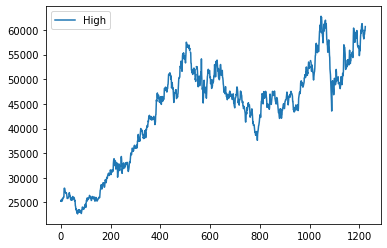

In [ ]:
data.plot()

In [ ]:
from statsmodels.tsa.ar_model import AR

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#create train/test datasets
X = data['High'].dropna()
train_data = X[1:len(X)-12]
test_data = X[len(X)-12:]

#train the autoregression model
model = AR(train_data)
model_fitted = model.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [ ]:
print('The lag value chose is: %s' % model_fitted.k_ar)

The lag value chose is: 22


In [ ]:
print('The coefficients of the model are:\n %s' % model_fitted.params)

The coefficients of the model are:
 const       136.357992
L1.High       1.137115
L2.High      -0.148703
L3.High      -0.031685
L4.High       0.006541
L5.High       0.051007
L6.High      -0.088621
L7.High       0.116443
L8.High      -0.111287
L9.High       0.143781
L10.High     -0.139999
L11.High      0.093458
L12.High     -0.100148
L13.High      0.058428
L14.High      0.037770
L15.High      0.027049
L16.High     -0.015229
L17.High     -0.033074
L18.High     -0.020413
L19.High      0.030885
L20.High     -0.043861
L21.High      0.047147
L22.High     -0.019100
dtype: float64


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


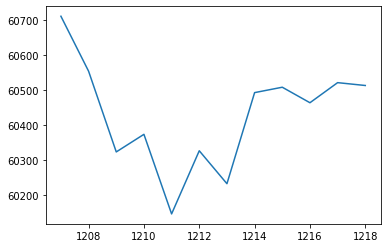

In [ ]:
# make predictions 
predictions = model_fitted.predict(
    start=len(train_data), 
    end=len(train_data) + len(test_data)-1, 
    dynamic=False)


#plot the two values
predictions.plot()

In [ ]:
print(len(train_data))

1207


In [ ]:
print(len(train_data) + len(test_data)-1)

1218


In [ ]:
print(predictions)

1207    60710.400327
1208    60553.583840
1209    60323.318371
1210    60373.520312
1211    60146.469486
1212    60326.614396
1213    60232.652312
1214    60492.515286
1215    60507.898410
1216    60463.648298
1217    60520.958853
1218    60512.825267
dtype: float64


In [ ]:
high_prices = data['High'].values
low_prices = data['Low'].values
mid_prices = (high_prices + low_prices) / 2

In [ ]:
print(mid_prices)

[25100. 25200. 24970. ... 59300. 59200. 60100.]


In [ ]:
seq_len = 50
sequence_length = seq_len + 1

result = []
for index in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[index: index + sequence_length])

In [ ]:
print(result)

In [ ]:
def normalize_windows(data):
    normalized_data = []
    for window in data:
       normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
       normalized_data.append(normalized_window)
    return np.array(normalized_data)

result = normalize_windows(result)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape


((1057, 50, 1), (117, 50, 1))

In [ ]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))

model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Epoch 1/20
106/106 [==============================] - 5s 44ms/step - loss: nan - val_loss: nan
Epoch 2/20
106/106 [==============================] - 4s 37ms/step - loss: nan - val_loss: nan
Epoch 3/20
106/106 [==============================] - 4s 37ms/step - loss: nan - val_loss: nan
Epoch 4/20
106/106 [==============================] - 4s 39ms/step - loss: nan - val_loss: nan
Epoch 5/20
106/106 [==============================] - 4s 37ms/step - loss: nan - val_loss: nan
Epoch 6/20
106/106 [==============================] - 4s 37ms/step - loss: nan - val_loss: nan
Epoch 7/20
106/106 [==============================] - 4s 38ms/step - loss: nan - val_loss: nan
Epoch 8/20
106/106 [==============================] - 4s 37ms/step - loss: nan - val_loss: nan
Epoch 9/20
106/106 [==============================] - 4s 38ms/step - loss: nan - val_loss: nan
Epoch 10/20
106/106 [==============================] - 4s 38ms/step - loss: nan - val_loss: nan
Epoch 11/20
106/106 [============================

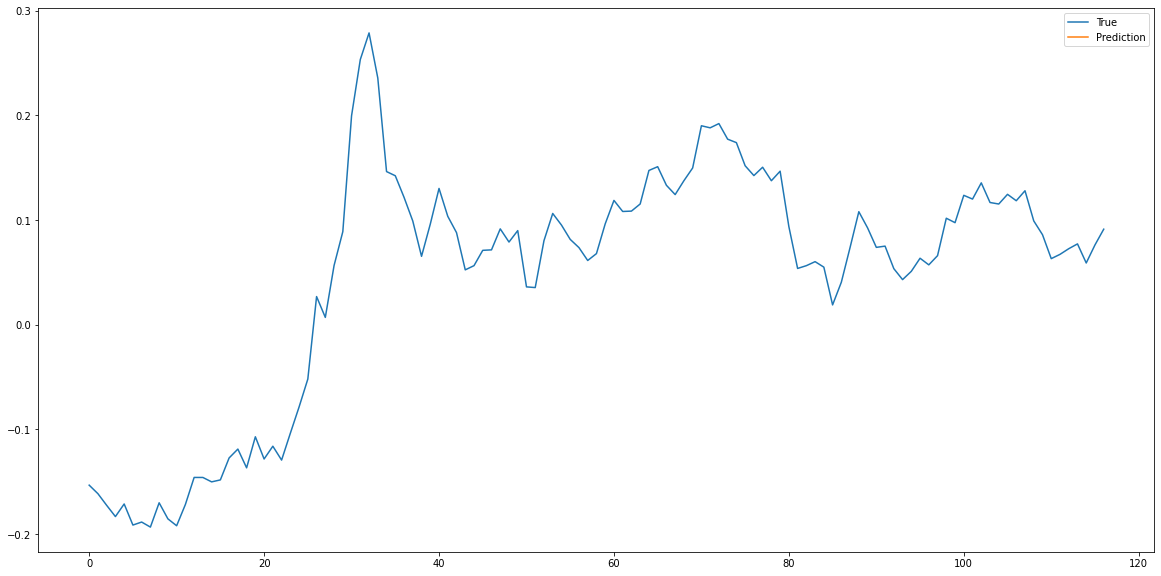

In [ ]:
pred = model.predict(x_test)

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()